In [1]:
from __future__ import print_function
%matplotlib inline
from pylab import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage
from skimage import *
from skimage.color import *
from skimage import io
import numpy as np
#plt.style.use('dark_background')

# RGB

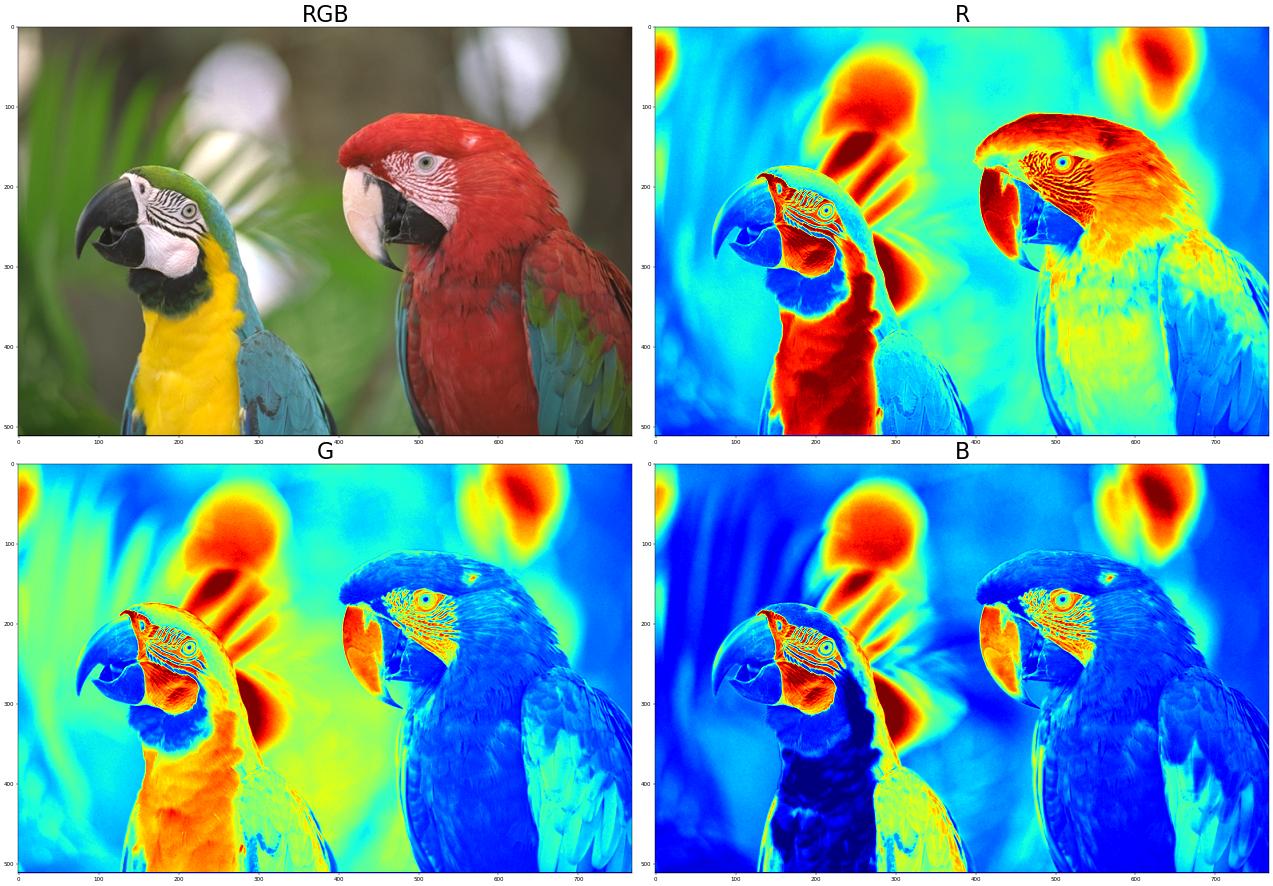

In [2]:
f_rgb = imread('parrots.png');

fig, ax = subplots(2, 2, figsize=(32,22), dpi=40);
tight_layout();
ax[0,0].imshow(f_rgb); ax[0,0].set_title('RGB', fontsize=40);
ax[0,1].imshow(f_rgb[:,:,0], vmin=0, vmax=1, cmap='jet'); ax[0,1].set_title('R', fontsize=40);
ax[1,0].imshow(f_rgb[:,:,1], vmin=0, vmax=1, cmap='jet'); ax[1,0].set_title('G', fontsize=40);
ax[1,1].imshow(f_rgb[:,:,2], vmin=0, vmax=1, cmap='jet'); ax[1,1].set_title('B', fontsize=40);

# YCbCr

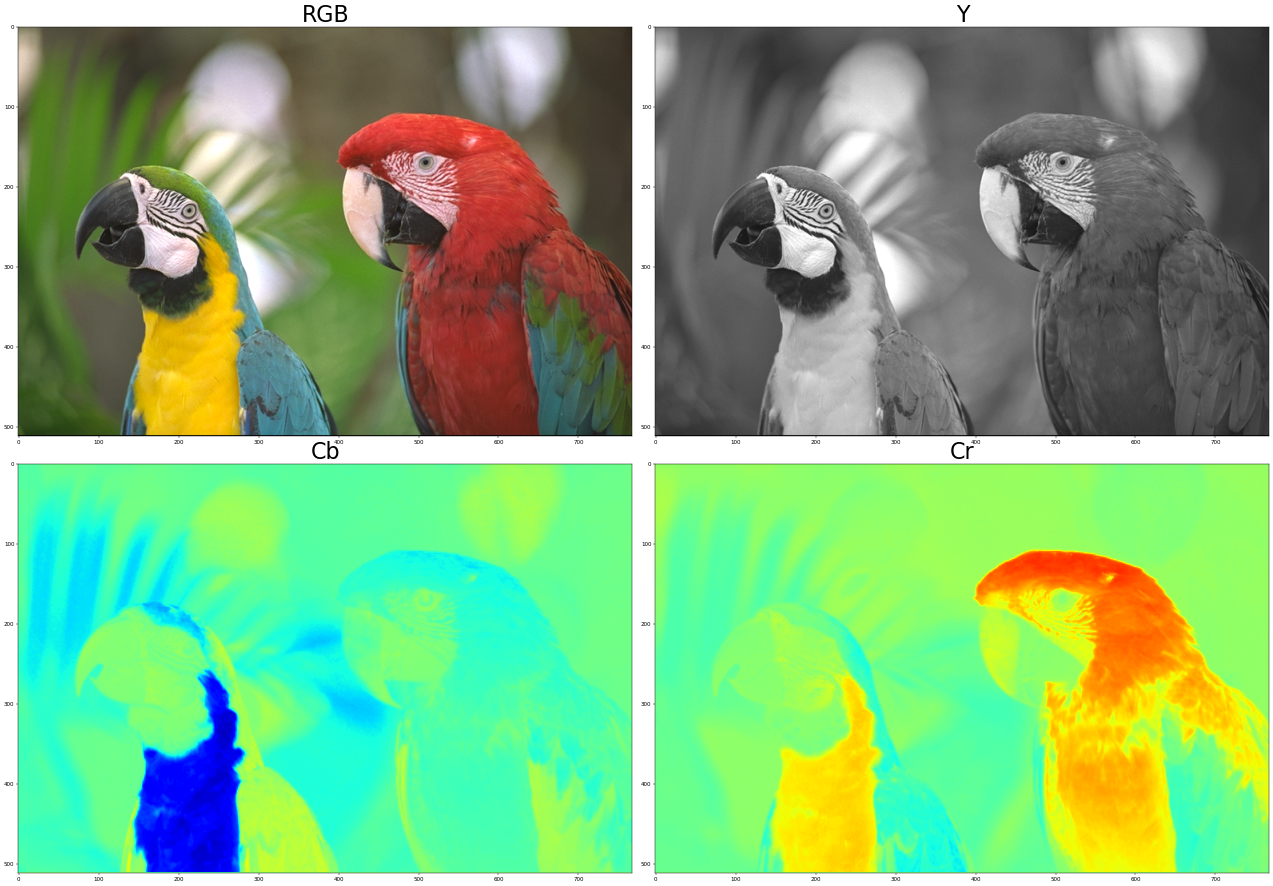

In [4]:
f_ycbcr = rgb2ycbcr(f_rgb);

fig, ax = subplots(2, 2, figsize=(32,22), dpi=40);
tight_layout();
ax[0,0].imshow(f_rgb); ax[0,0].set_title('RGB', fontsize=40);
ax[0,1].imshow(f_ycbcr[:,:,0], vmin=16, vmax=235, cmap='gray'); ax[0,1].set_title('Y', fontsize=40);
ax[1,0].imshow(f_ycbcr[:,:,1], vmin=16, vmax=235, cmap='jet'); ax[1,0].set_title('Cb', fontsize=40);
ax[1,1].imshow(f_ycbcr[:,:,2], vmin=16, vmax=235, cmap='jet'); ax[1,1].set_title('Cr', fontsize=40);

# HSV

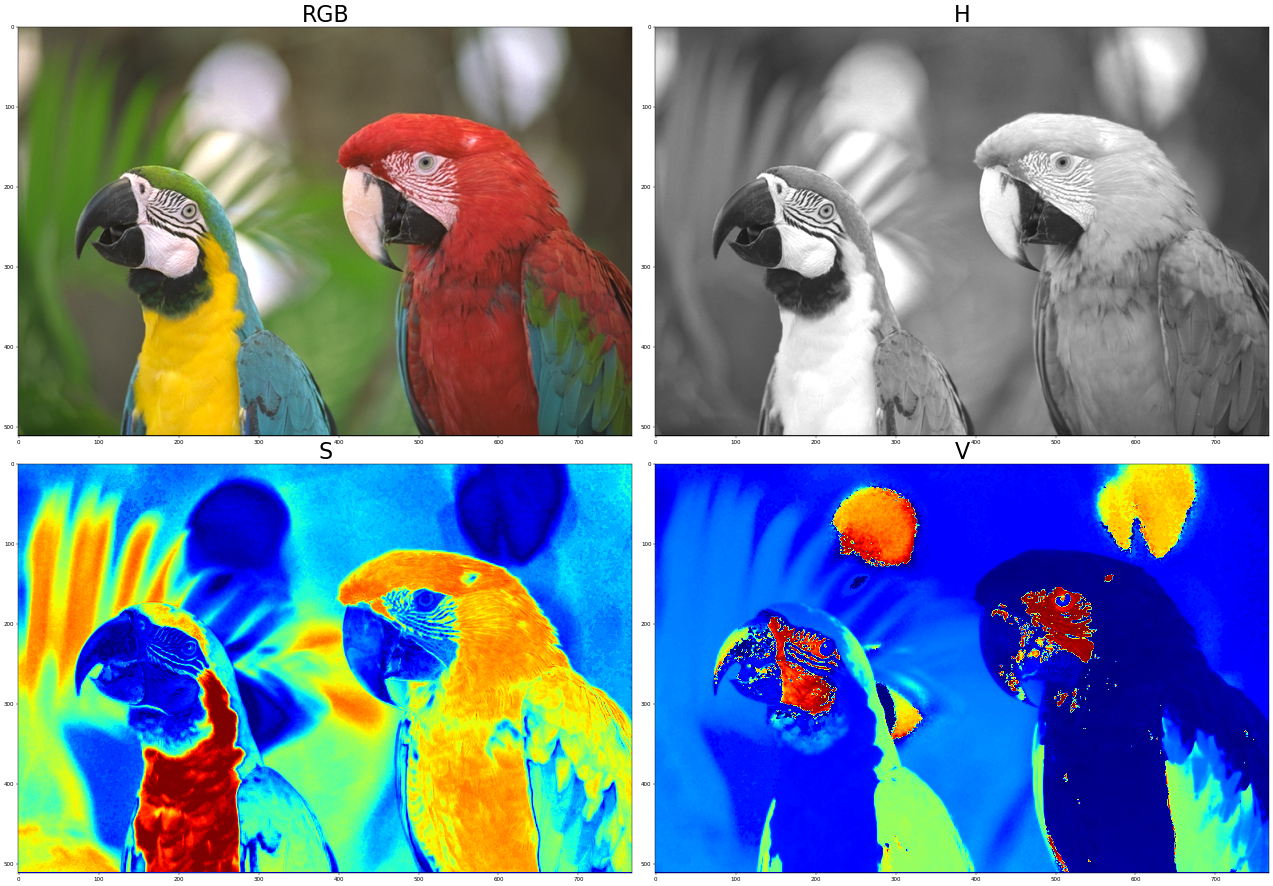

In [5]:
f_rgb = imread('parrots.png')

f_hsv = rgb2hsv(f_rgb);

fig, ax = subplots(2, 2, figsize=(32,22), dpi=40)
tight_layout()

hue = f_hsv[:,:,0]; sat = f_hsv[:,:,1]; val = f_hsv[:,:,2];

ax[0,0].imshow(hsv2rgb(f_hsv)); ax[0,0].set_title('RGB', fontsize=40);
ax[0,1].imshow(val, vmin=0, vmax=1, cmap='gray'); ax[0,1].set_title('H', fontsize=40);
ax[1,0].imshow(sat, vmin=0, vmax=1, cmap='jet'); ax[1,0].set_title('S', fontsize=40);
ax[1,1].imshow(hue, vmin=0, vmax=1, cmap='jet'); ax[1,1].set_title('V', fontsize=40);

## HSV shift

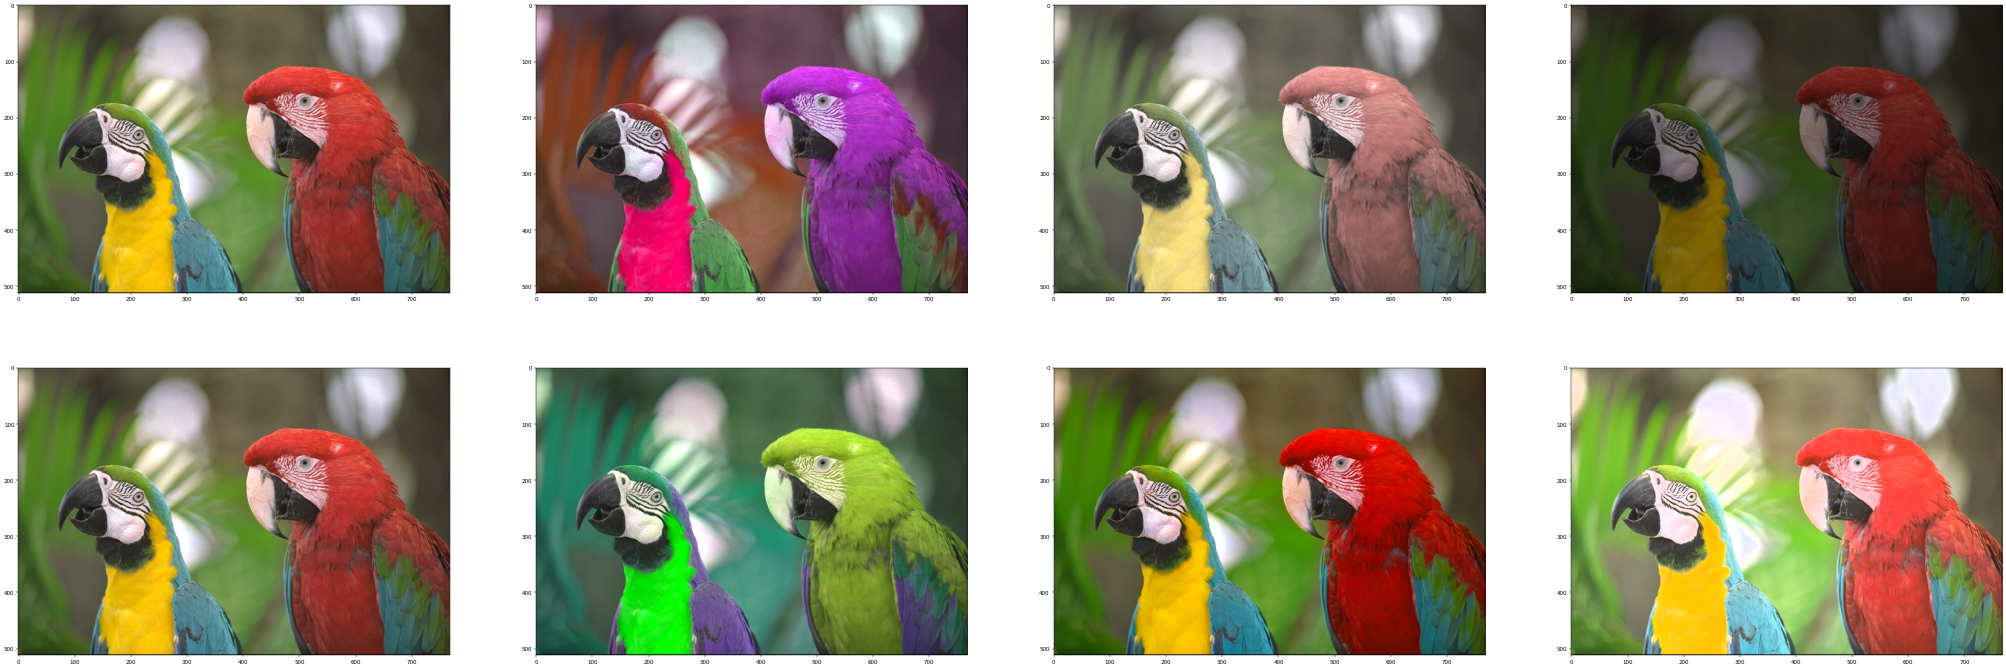

In [7]:
hue_shift1 = hue - 0.2
hue_shift1[hue_shift1<0] = hue_shift1[hue_shift1<0] + 1

hue_shift2 = hue + 0.2
hue_shift2[hue_shift2>1] = hue_shift2[hue_shift2>1] - 1

g_hsv = zeros(shape(f_hsv))
g_hsv[:,:,:] = f_hsv[:,:,:]

fig, ax = subplots(2, 4, figsize=(32*2,22), dpi=40)

ax[0,0].imshow(f_rgb)
ax[1,0].imshow(hsv2rgb(f_hsv))

g_hsv[:,:,0] = hue_shift1
ax[0,1].imshow(hsv2rgb(g_hsv))

g_hsv[:,:,0] = hue_shift2
ax[1,1].imshow(hsv2rgb(g_hsv))

g_hsv[:,:,0] = hue
g_hsv[:,:,1] = 0.5*sat
ax[0,2].imshow(hsv2rgb(g_hsv))

g_hsv[:,:,1] = np.minimum(1.5*sat, 1)
ax[1,2].imshow(hsv2rgb(g_hsv))

g_hsv[:,:,1] = sat
g_hsv[:,:,2] = 0.5*val
ax[0,3].imshow(hsv2rgb(g_hsv))

g_hsv[:,:,2] = np.minimum(1.5*val, 1)
ax[1,3].imshow(hsv2rgb(g_hsv))


## Siva slika - slika osvetljaja

Text(0.5, 1.0, 'I')

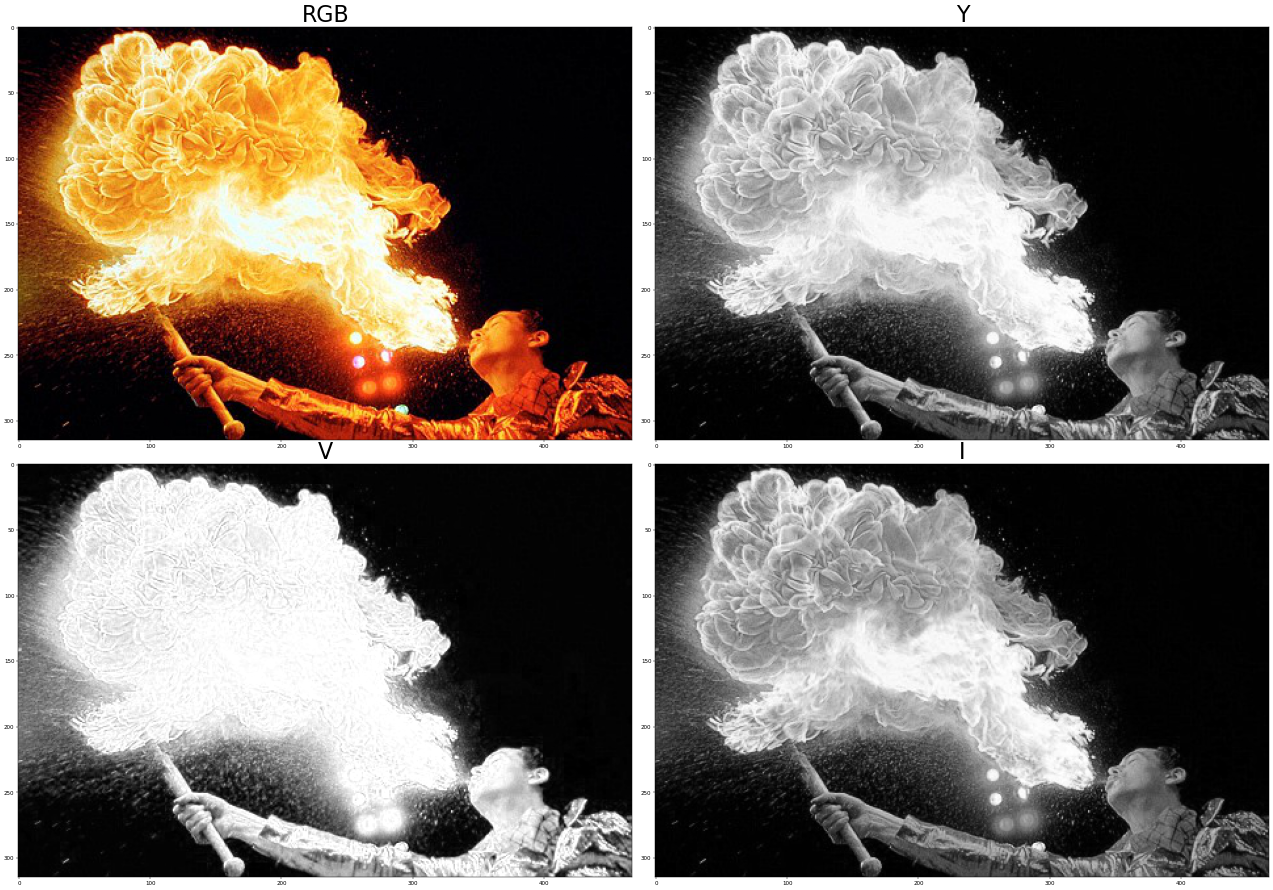

In [10]:
f_rgb = double(imread('fire.jpg'))/255

f_ycbcr = rgb2ycbcr(f_rgb)
f_hsv = rgb2hsv(f_rgb)
I = (f_rgb[:,:,0] + f_rgb[:,:,1] + f_rgb[:,:,2])/3

fig, ax = subplots(2, 2, figsize=(32,22), dpi=40)
tight_layout()

ax[0,0].imshow(f_rgb)
ax[0,0].set_title('RGB', fontsize=40)

ax[0,1].imshow(f_ycbcr[:,:,0], vmin=16, vmax=235, cmap='gray')
ax[0,1].set_title('Y', fontsize=40)

ax[1,0].imshow(f_hsv[:,:,2], vmin=0, vmax=1, cmap='gray')
ax[1,0].set_title('V', fontsize=40)

ax[1,1].imshow(I, vmin=0, vmax=1, cmap='gray')
ax[1,1].set_title('I', fontsize=40)

## Segmentacija pomocu boje - HSV

In [11]:
def create_mask(image, image_hsv, hue_low=0, hue_high=1, hue_and_or=1, sat_low=0, sat_high=1, value_low=0, value_high=1):
    hue = np.copy(image_hsv[:,:,0])
    saturation = np.copy(image_hsv[:,:,1])
    value = np.copy(image_hsv[:,:,2])
    if (hue_and_or):
        mask = ((hue>=hue_low)&(hue<=hue_high) & (saturation>=sat_low)&(saturation<=sat_high) & (value>=value_low)&(value<=value_high))
    else:
        mask = ((hue<=hue_low) | (hue>=hue_high)) & (saturation>=sat_low)&(saturation<=sat_high) & (value>=value_low)&(value<=value_high)
    
    mask = np.invert(mask)
    imaged = np.copy(image)
    imaged[mask] = 0
    figure(figsize=(20,20), dpi=40)
    imshow(imaged)
    return

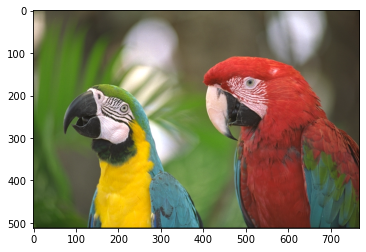

interactive(children=(FloatSlider(value=0.0, description='hue_low', max=1.0, step=0.05), FloatSlider(value=1.0…

In [16]:
image = io.imread('parrots.png')
figure, imshow(image)
image_hsv = skimage.color.rgb2hsv(image)
# crvena boja ima vrednosti hue oko 0 tj 360

interact(create_mask, image=fixed(image), image_hsv=fixed(image_hsv), hue_low=(0,1,0.05), hue_high=(0,1,0.05), hue_and_or=(0,1,1), sat_low=(0,1,0.05), sat_high=(0,1,0.05), value_low=(0,1,0.05), value_high=(0,1,0.05));